# House Price Prediction

### Data Lit || Homework Assignment || Regression

by Denis Volchugin

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msngo

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from pivottablejs import pivot_ui

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer

sns.set()
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

%matplotlib inline

In [2]:
test = pd.read_csv ('../Data/test.csv')
train = pd.read_csv ('../Data/train.csv')

In [3]:
pd.set_option ('display.max_columns', 500)
pd.set_option ('display.max_rows', 500)

## OK, what do we have here?

In [4]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.000,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.000,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.000,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.000,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.000,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,No

In [5]:
Dscr = train.describe(include='all').T
Dscr

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.000,NaN,NaN,NaN,730.500,421.610,1.000,365.750,730.500,1095.250,1460.000
MSSubClass,1460.000,NaN,NaN,NaN,56.897,42.301,20.000,20.000,50.000,70.000,190.000
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.000,NaN,NaN,NaN,70.050,24.285,21.000,59.000,69.000,80.000,313.000
LotArea,1460.000,NaN,NaN,NaN,10516.828,9981.265,1300.000,7553.500,9478.500,11601.500,215245.000
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like some people sell houses, some people buy houses...
Can we use this info somehow? To tell the truth, the job is not very inspiring, but it has to be done! 
Like Russians say - "once the carriage is grasped, don't say you can't manage it!"

### What kind of cargo can we drop to move faster?

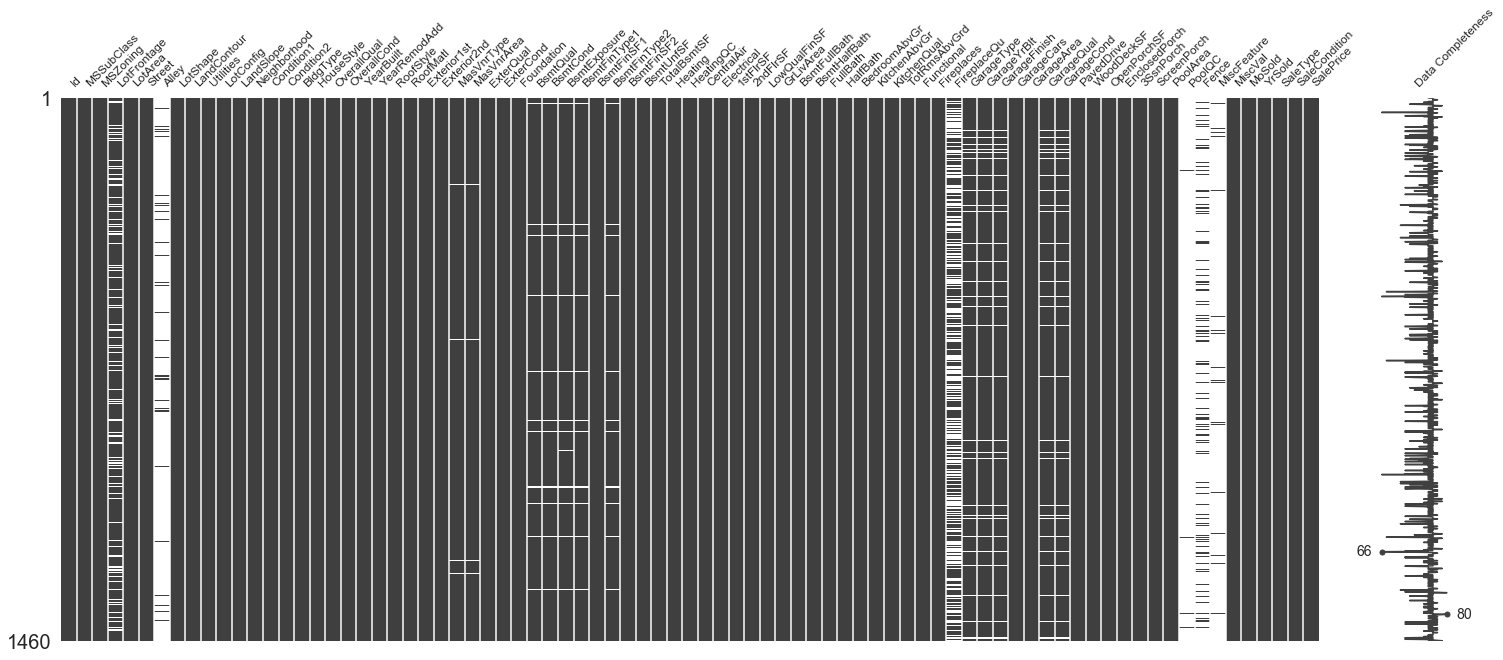

In [6]:
msngo.matrix(train, labels=True, fontsize=12);

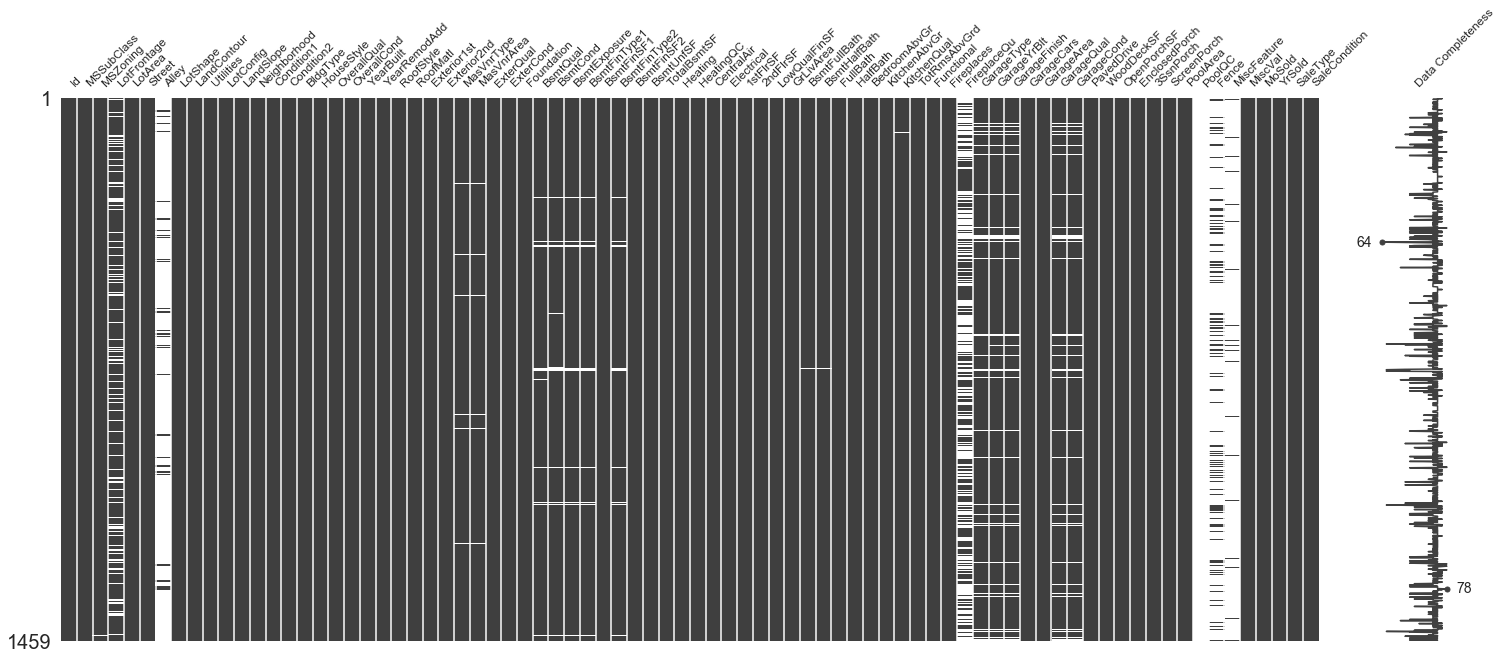

In [7]:
msngo.matrix(test, labels=True, fontsize=12);

two files are pretty similar. some data is missing, but we can live with that. I'll just pretend I don't see that empty columns. But, wait a minute? is there any reason to wait for? I don't think so.

In [8]:
train.drop(
    ["LotFrontage", "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"],
    axis=1,
    inplace=True,
)
test.drop(
    ["LotFrontage", "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"],
    axis=1,
    inplace=True,
)

I've noticed that we've got 2 blocks of info concerning Basement and Garage with a lot of missing values.

In [9]:
train[train["GarageFinish"].isna()][:30]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.000,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,nan,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
48,49,190,RM,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,nan,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,0,6,2009,New,Partial,113000
78,79,90,RL,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.000,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NaN,nan,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,136500
88,89,50,C (all),8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.000,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,nan,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NaN,nan,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,123600
99,100,20,RL,9320,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,None,0.000,TA,TA,CBlock,TA,TA,No,ALQ,569,Unf,0,381,950,GasA,Fa,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,6,Typ,0,NaN,nan,NaN,0,0,NaN,NaN,Y,352,0,0,0,0,0,400,1,2010,WD,Normal,128950
108,109,50,RM,8500,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1919,2005,Gable,CompShg,CemntBd,CmentBd,None,0.000,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,793,793,GasW,TA,N,FuseF,997,520,0,1517,0,0,2,0,3,1,Fa,7,Typ,0,NaN,nan,NaN,0,0,NaN,NaN,N,0,0,144,0,0,0,0,8,2007,WD,Normal,115000
125,126,190,RM,6780,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,30,520,GasA,Gd,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,NaN,nan,NaN,0,0,NaN,NaN,N,53,0,0,0,0,0,0,6,2006,WD,Normal,84500
127,128,45,RM,4388,Pave,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Unf,5,7,1930,1950,Gable,CompShg,WdShing,Wd Sdng,None,0.000,TA,Gd,BrkTil,TA,TA,No,LwQ,116,Unf,0,556,672,GasA,Ex,Y,SBrkr,840,0,0,840,0,0,1,0,3,1,TA,5,Typ,1,NaN,nan,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2007,WD,Normal,87000
140,141,20,RL,10500,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.000,TA,TA,CBlock,TA,TA,No,ALQ,432,Unf,0,432,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,1,NaN,nan,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,ConLI,Normal,115000


All raws with NaNs have 0 Cars. It makes me think that there's no garage in the house. In this case according to description of the dataset it should contain NA. The same with Basement. If square feet = 0, there's no basement in the house and basement quality must contain NA.

In [10]:
# 'GarageQual', 'GarageCond', 'GarageFinish', 'GarageType', 'GarageYrBlt',
# BsmtCond', 'BsmtQual' , 'BsmtExposure, 'BsmtFinType1'
train["GarageQual"].fillna("NA", inplace=True)
train["GarageCond"].fillna("NA", inplace=True)
train["GarageFinish"].fillna("NA", inplace=True)
train["GarageType"].fillna("NA", inplace=True)
train["GarageYrBlt"].fillna("NA", inplace=True)
train["BsmtCond"].fillna("NA", inplace=True)
train["BsmtQual"].fillna("NA", inplace=True)
train["BsmtExposure"].fillna("NA", inplace=True)
train["BsmtFinType1"].fillna("NA", inplace=True)

In [11]:
test["GarageQual"].fillna("NA", inplace=True)
test["GarageCond"].fillna("NA", inplace=True)
test["GarageFinish"].fillna("NA", inplace=True)
test["GarageType"].fillna("NA", inplace=True)
test["GarageYrBlt"].fillna("NA", inplace=True)
test["BsmtCond"].fillna("NA", inplace=True)
test["BsmtQual"].fillna("NA", inplace=True)
test["BsmtExposure"].fillna("NA", inplace=True)
test["BsmtFinType1"].fillna("NA", inplace=True)

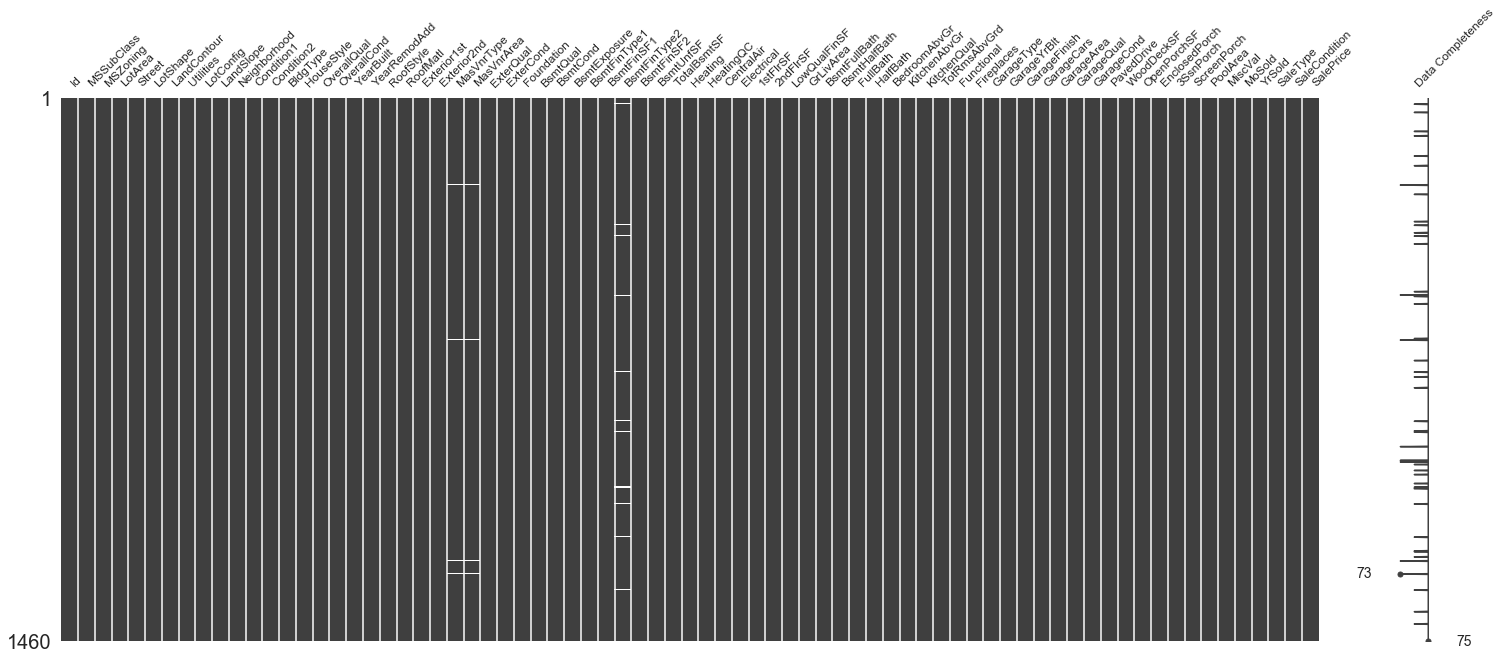

In [12]:
msngo.matrix(train, labels=True, fontsize=12);

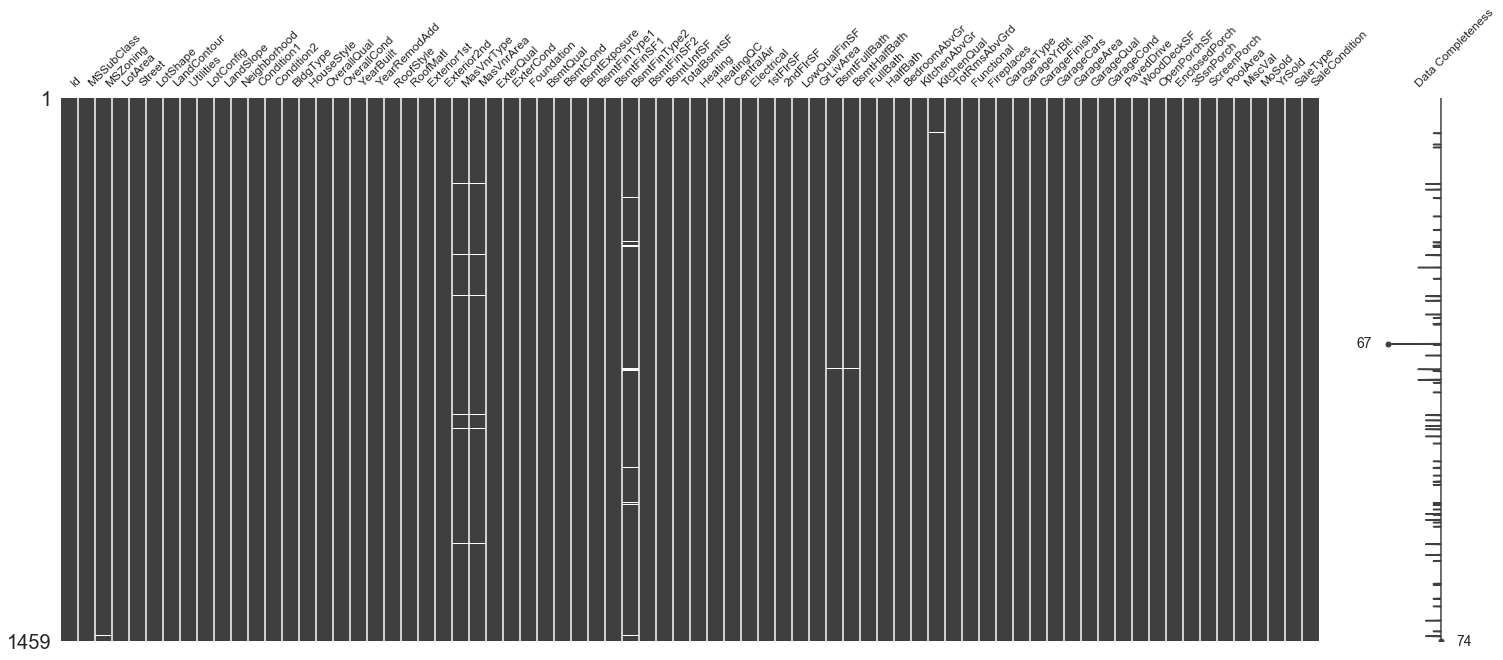

In [13]:
msngo.matrix(test, labels=True, fontsize=12);

It's strange that some columns describing quality contain values and some of them contain text. So, if we would like to check whether this features are correlated or not, it would be nice to have them evaluated. Let's have a closer look.

In [14]:
CatLs = train.describe(include="all").T["unique"].dropna().sort_values()
CatLs

Street            2
Utilities         2
CentralAir        2
LandSlope         3
PavedDrive        3
GarageFinish      4
LotShape          4
LandContour       4
ExterQual         4
MasVnrType        4
KitchenQual       4
BsmtCond          5
BsmtQual          5
ExterCond         5
HeatingQC         5
MSZoning          5
BsmtExposure      5
BldgType          5
LotConfig         5
Electrical        5
GarageQual        6
Heating           6
GarageCond        6
BsmtFinType2      6
Foundation        6
RoofStyle         6
SaleCondition     6
Functional        7
GarageType        7
BsmtFinType1      7
RoofMatl          8
HouseStyle        8
Condition2        8
SaleType          9
Condition1        9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
GarageYrBlt      98
Name: unique, dtype: object

Such much?! I don't have time for all of you. The fattiest will be thrown out first. Some will be considered. 

In [15]:
Cat2Num = [
    "Street",
    "Utilities",
    "CentralAir",
    "PavedDrive",
    "LandSlope",
    "KitchenQual",
    "BsmtCond",
    "BsmtQual",
    "ExterQual",
    "Electrical",
    "HeatingQC",
    "ExterCond",
    "Heating",
    "BsmtFinType1",
    "BsmtFinType2",
    "SaleCondition",
]

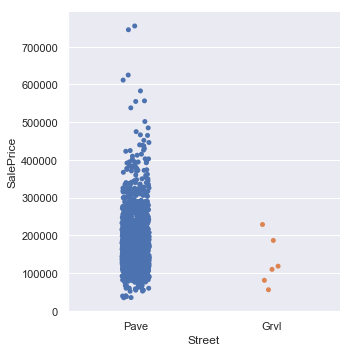

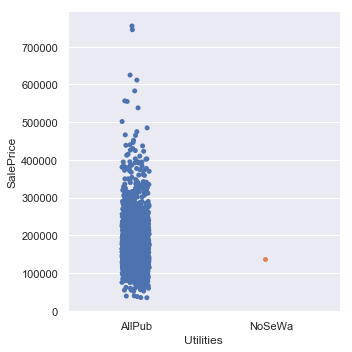

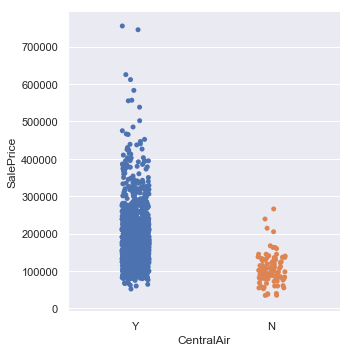

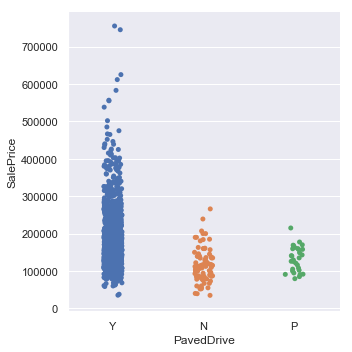

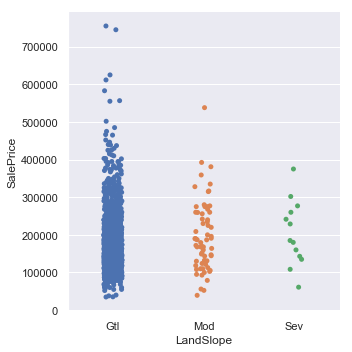

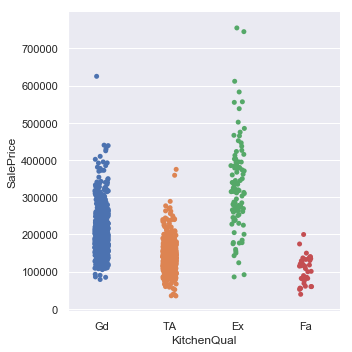

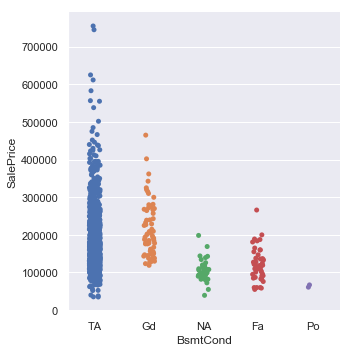

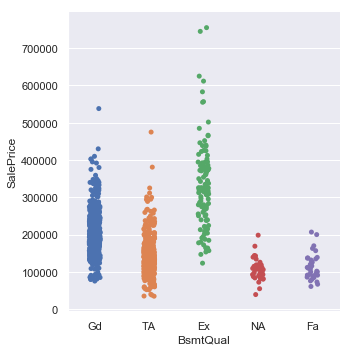

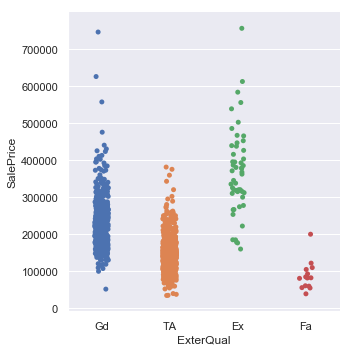

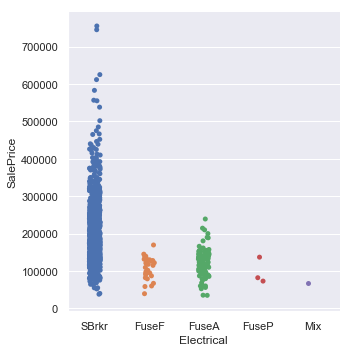

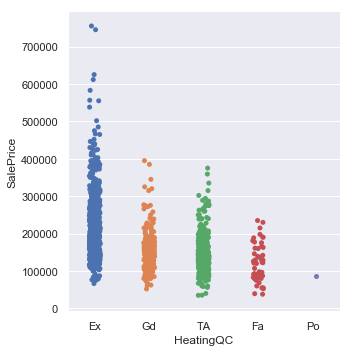

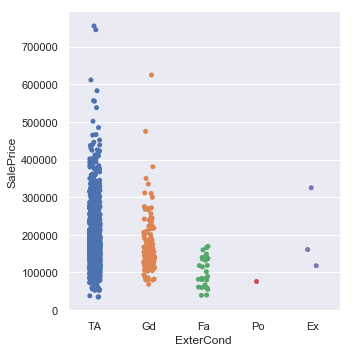

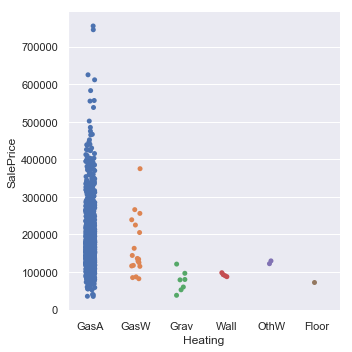

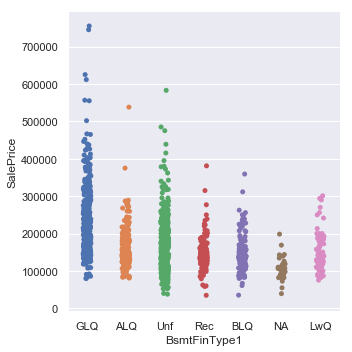

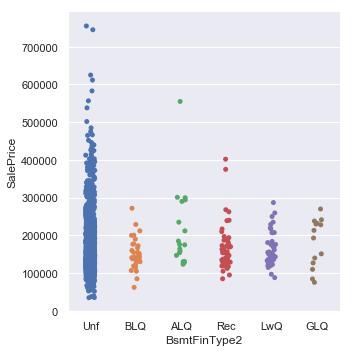

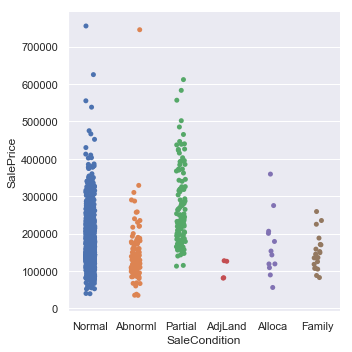

In [16]:
for Cat in Cat2Num:
    print(sns.catplot(x=Cat, y="SalePrice", data=train))

In [17]:
# Add new column Central Cond with values 0 and 1 for N and Y
train["CentralAirV"] = np.where(train.CentralAir == "N", 0, 1)
test["CentralAirV"] = np.where(test.CentralAir == "N", 0, 1)

Overall quality of the house in this dataset was estimated from 1 to 10. But some features contain categorical representation of the estimates. Let's fix it.

In [18]:
Vals = {
    "NA": 0, 
    "Po": 2, 
    "Fa": 4, 
    "TA": 6, 
    "Gd": 8, 
    "Ex": 10}

In [19]:
train["KitchenQualV"] = train["KitchenQual"].map(Vals)
train["BsmtQualV"] = train["BsmtQual"].map(Vals)
train["BsmtCondV"] = train["BsmtCond"].map(Vals)
train["ExterQualV"] = train["ExterQual"].map(Vals)
train["HeatingQCV"] = train["HeatingQC"].map(Vals)
train["ExterCondV"] = train["ExterCond"].map(Vals)

In [20]:
test['KitchenQualV'] = test['KitchenQual'].map (Vals)
test['BsmtQualV'] = test['BsmtQual'].map (Vals)
test['BsmtCondV'] = test['BsmtCond'].map (Vals)
test['ExterQualV'] = test['ExterQual'].map (Vals)
test['HeatingQCV'] = test['HeatingQC'].map (Vals)
test['ExterCondV'] = test['ExterCond'].map (Vals)

In [21]:
SaleCond = {
    "Normal": 1,
    "Abnorml": 0,
    "Partial": 1,
    "AdjLand": 0,
    "Alloca": 0,
    "Family": 0,
}

In [22]:
train["SaleConditionV"] = train["SaleCondition"].map(SaleCond)

In [23]:
test["SaleConditionV"] = train["SaleCondition"].map(SaleCond)

In [24]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAirV,KitchenQualV,BsmtQualV,BsmtCondV,ExterQualV,HeatingQCV,ExterCondV,SaleConditionV
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,1,8,8,6,8,10,6,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,1,6,8,6,6,10,6,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,1,8,8,6,8,10,6,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,1,8,6,8,6,8,6,0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,1,8,8,6,8,10,6,1


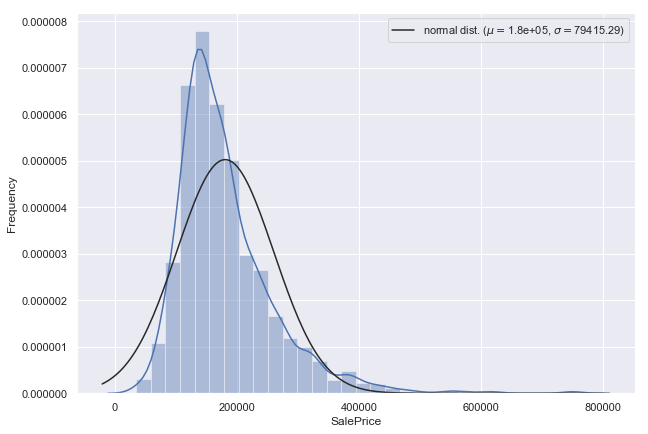

In [25]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(train.SalePrice, fit=stats.norm, bins=30)

# get fit params
mu, sigma = stats.norm.fit(train.SalePrice)

# legend and label
plt.legend(["normal dist. ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
plt.ylabel("Frequency");

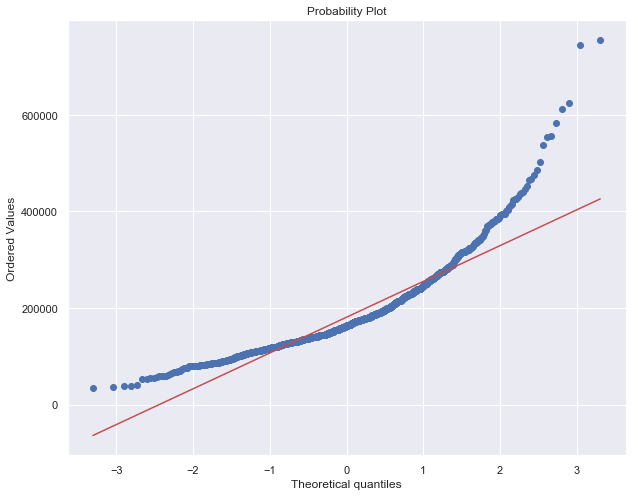

In [26]:
fig, ax = plt.subplots(figsize=(10, 8))
res = stats.probplot(train["SalePrice"], plot=plt)

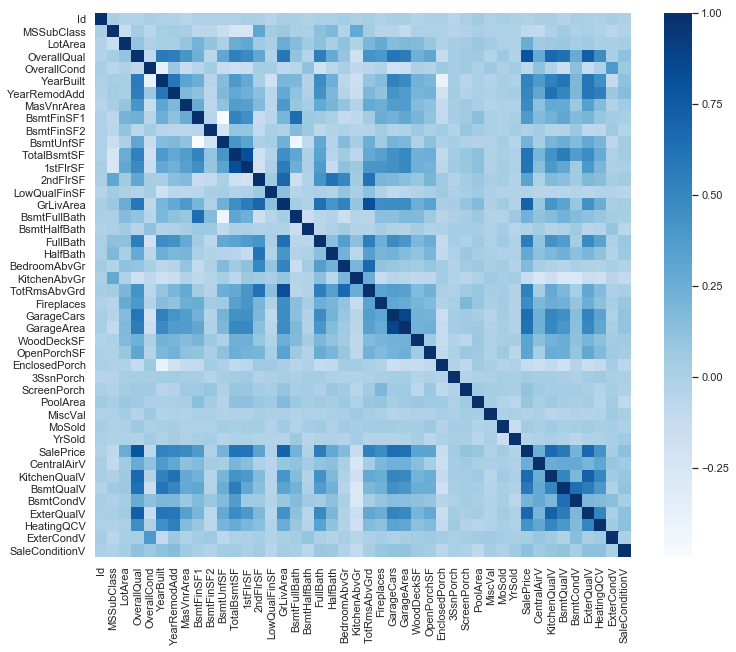

In [27]:
corrmat = train.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, cmap="Blues");

In [28]:
corrmat["SalePrice"].sort_values(ascending=False)

SalePrice         1.000
OverallQual       0.791
GrLivArea         0.709
ExterQualV        0.683
KitchenQualV      0.660
GarageCars        0.640
GarageArea        0.623
TotalBsmtSF       0.614
1stFlrSF          0.606
BsmtQualV         0.585
FullBath          0.561
TotRmsAbvGrd      0.534
YearBuilt         0.523
YearRemodAdd      0.507
MasVnrArea        0.477
Fireplaces        0.467
HeatingQCV        0.428
BsmtFinSF1        0.386
WoodDeckSF        0.324
2ndFlrSF          0.319
OpenPorchSF       0.316
HalfBath          0.284
LotArea           0.264
CentralAirV       0.251
BsmtFullBath      0.227
BsmtUnfSF         0.214
BsmtCondV         0.213
BedroomAbvGr      0.168
SaleConditionV    0.135
ScreenPorch       0.111
PoolArea          0.092
MoSold            0.046
3SsnPorch         0.045
ExterCondV        0.019
BsmtFinSF2       -0.011
BsmtHalfBath     -0.017
MiscVal          -0.021
Id               -0.022
LowQualFinSF     -0.026
YrSold           -0.029
OverallCond      -0.078
MSSubClass      

In [29]:
# main factors influencing SalePrice:
Sfctr = [
    "SalePrice",
    "OverallQual",
    "GrLivArea",
    "ExterQualV",
    "KitchenQualV",
    "BsmtQualV",
    "GarageCars",
    "TotalBsmtSF",
    "FullBath",
    "TotRmsAbvGrd",
    "YearBuilt",
    "YearRemodAdd",
]

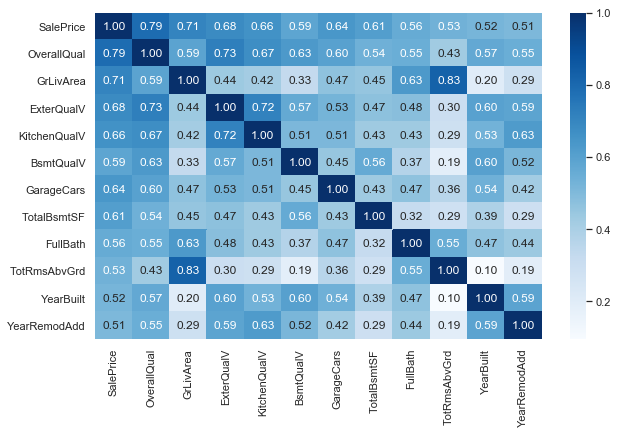

In [30]:
# let's look at them through the OKULAR O_O
fig, ax = plt.subplots(figsize=(10, 6))
cm = np.corrcoef(train[Sfctr].values.T)
sns.set(font_scale=1)
sns.heatmap(
    cm, cmap="Blues", annot=True, fmt=".2f", yticklabels=Sfctr, xticklabels=Sfctr
);

In [31]:
# Oh, wait a second... is it safe? is it clear?
null = train[train[Sfctr] == 0][Sfctr].count()
NaN = train[train[Sfctr].isnull()][Sfctr].count()
NoData = pd.concat([null, NaN], axis=1, keys=["null", "NaN"])
NoData

,null,NaN
SalePrice,0,0
OverallQual,0,0
GrLivArea,0,0
ExterQualV,0,0
KitchenQualV,0,0
BsmtQualV,37,0
GarageCars,81,0
TotalBsmtSF,37,0
FullBath,9,0
TotRmsAbvGrd,0,0


main factors that influence Sale Price don't have missing values. Garage cars and Total basement with zero values seem OK, since it is possible that there's no garage or basement in the house in fact

### How many of us are lazy?

In [32]:
len(train[train["YearBuilt"] != train["YearRemodAdd"]]) / len(train)

0.4767123287671233

almost 50% never remodel their houses (or... we don't know about that since they are smart enough to keep it in secret). not bad! 
But does it affect Sale Price? 

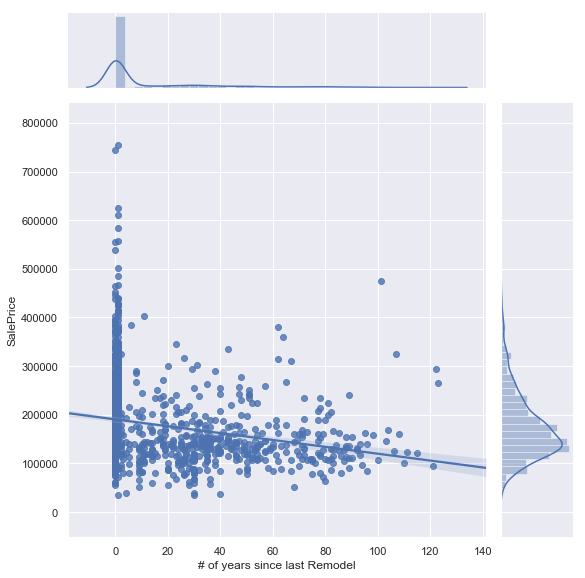

In [33]:
x = train["YearRemodAdd"] - train["YearBuilt"]
sns.jointplot(x=x, y="SalePrice", kind="reg", height=8, data=train)
plt.xlabel("# of years since last Remodel")
plt.show()

I really don't know. There's a light negative tendency, but it doesn't look like we should take it into account.  

### Wide look at the data

['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQualV', 'KitchenQualV']


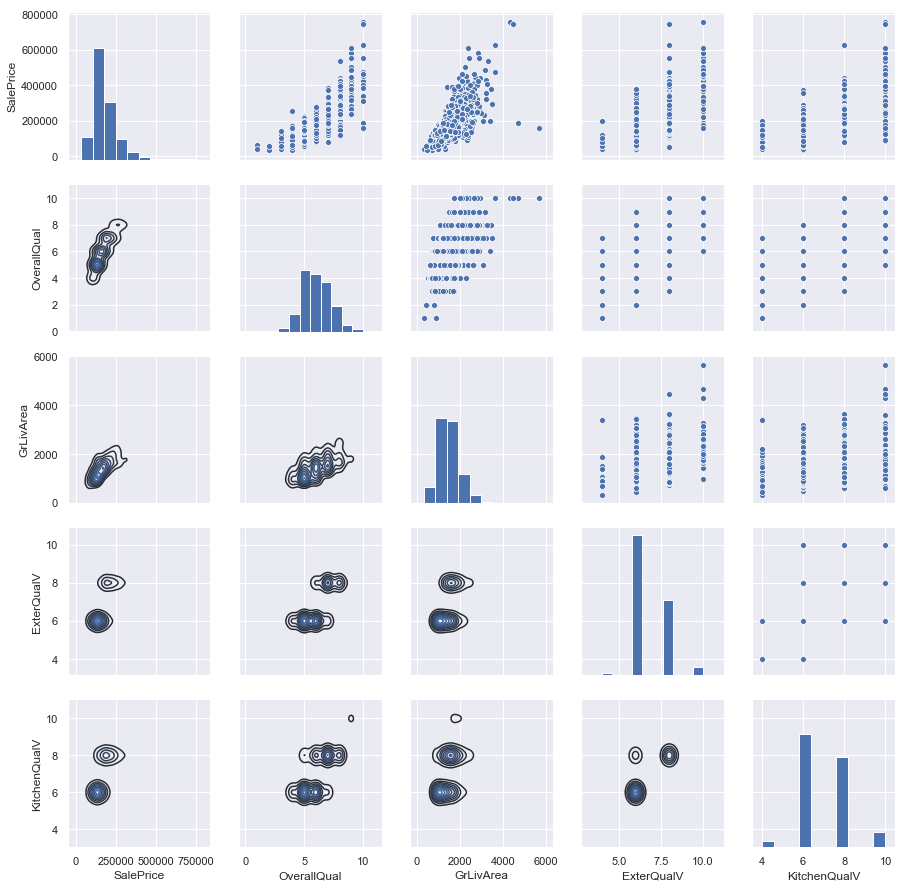

In [34]:
print(Sfctr[:5])
g = sns.PairGrid(train[Sfctr[:5]])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(plt.hist);

### What about outliers?

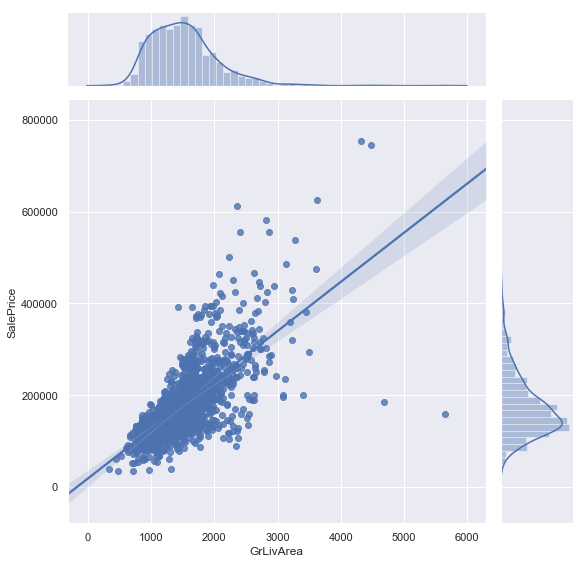

In [35]:
sns.jointplot(x="GrLivArea", y="SalePrice", kind="reg", height=8, data=train);

In [36]:
# remove outliers (huge living area for a suspiciously low price)
Ctrain = train.drop(
    train[(train["GrLivArea"] > 4000) & (train["SalePrice"] < 200000)].index
)  # Cleaned train data

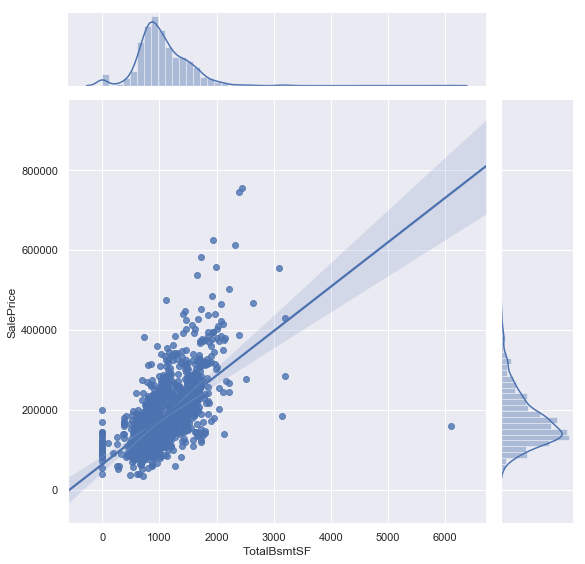

In [37]:
sns.jointplot(x="TotalBsmtSF", y="SalePrice", kind="reg", height=8, data=train);

In [38]:
# remove outliers (huge basement for a suspiciously low price)
Ctrain = Ctrain.drop(
    Ctrain[(Ctrain["TotalBsmtSF"] > 6000) & (Ctrain["SalePrice"] < 200000)].index
)

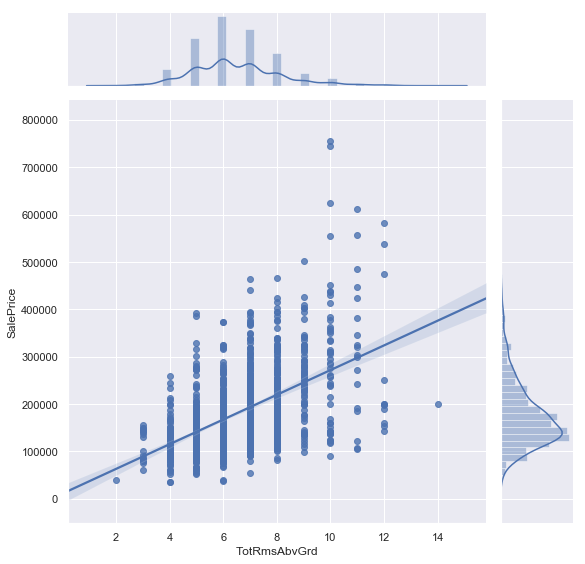

In [39]:
sns.jointplot(x="TotRmsAbvGrd", y="SalePrice", kind="reg", height=8, data=train);

In [40]:
train[train["TotRmsAbvGrd"] == 14]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAirV,KitchenQualV,BsmtQualV,BsmtCondV,ExterQualV,HeatingQCV,ExterCondV,SaleConditionV
635,636,190,RH,10896,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,None,0.000,Fa,TA,CBlock,TA,Fa,No,LwQ,256,Unf,0,1184,1440,GasA,Ex,Y,FuseA,1440,1440,515,3395,0,0,2,0,8,2,Fa,14,Typ,0,NA,NA,NA,0,0,NA,NA,N,0,110,0,0,0,0,0,3,2007,WD,Abnorml,200000,1,4,6,4,4,10,6,0


huge house with 14 rooms at a low price... hm. But Sale condition is abnormal. OK, we will leave it as it is. Lets have a look a Sale conditions once more. It's strange that correlation with SalePrice is low.

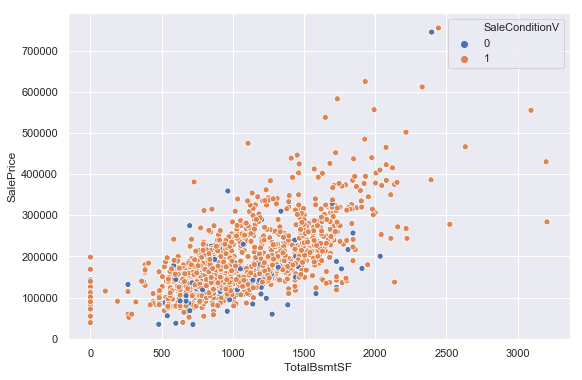

In [41]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", hue="SaleConditionV", data=Ctrain);

well, OK.

## FINALLY REGRESSION

In [42]:
target = Ctrain.SalePrice

In [43]:
features = [
    "OverallQual",
    "GrLivArea",
    "ExterQualV",
    "KitchenQualV",
    "BsmtQualV",
    "GarageCars",
    "TotalBsmtSF",
    "FullBath",
    "TotRmsAbvGrd",
    "YearBuilt",
    "YearRemodAdd",
]

In [44]:
# make sure our test data contains all necessary information
test [features].describe()

,OverallQual,GrLivArea,ExterQualV,KitchenQualV,BsmtQualV,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
count,1459.000,1459.000,1459.000,1458.000,1459.000,1458.000,1458.000,1459.000,1459.000,1459.000,1459.000
mean,6.079,1486.046,6.795,7.021,6.932,1.766,1046.118,1.571,6.385,1971.358,1983.663
std,1.437,485.566,1.173,1.322,1.867,0.776,442.899,0.555,1.509,30.390,21.130
min,1.000,407.000,4.000,4.000,0.000,0.000,0.000,0.000,3.000,1879.000,1950.000
25%,5.000,1117.500,6.000,6.000,6.000,1.000,784.000,1.000,5.000,1953.000,1963.000
50%,6.000,1432.000,6.000,6.000,6.000,2.000,988.000,2.000,6.000,1973.000,1992.000
75%,7.000,1721.000,8.000,8.000,8.000,2.000,1305.000,2.000,7.000,2001.000,2004.000
max,10.000,5095.000,10.000,10.000,10.000,5.000,5095.000,4.000,15.000,2010.000,2010.000


### Some more minor cleaning (

In [45]:
test[test["KitchenQual"].isna()]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,CentralAirV,KitchenQualV,BsmtQualV,BsmtCondV,ExterQualV,HeatingQCV,ExterCondV,SaleConditionV
95,1556,50,RL,10632,Pave,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,TA,TA,BrkTil,Gd,Fa,No,Unf,0.000,Unf,0.000,689.000,689.000,GasA,Gd,N,SBrkr,725,499,0,1224,0.000,0.000,1,1,3,1,NaN,6,Mod,0,Detchd,1917.000,Unf,1.000,180.000,Fa,Fa,N,0,0,248,0,0,0,0,1,2010,COD,Normal,0,nan,8,4,6,8,6,1


In [46]:
# Kitchen is above grade so I'll give it 8
test["KitchenQualV"].fillna(8, inplace=True)

In [47]:
test[test["GarageCars"].isna()]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,CentralAirV,KitchenQualV,BsmtQualV,BsmtCondV,ExterQualV,HeatingQCV,ExterCondV,SaleConditionV
1116,2577,70,RM,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.000,TA,TA,BrkTil,Gd,TA,No,ALQ,548.000,Unf,0.000,311.000,859.000,GasA,Ex,Y,SBrkr,942,886,0,1828,0.000,0.000,2,0,3,1,Gd,6,Typ,0,Detchd,NA,NA,nan,nan,NA,NA,Y,174,0,212,0,0,0,0,3,2007,WD,Alloca,1,8.000,8,6,6,10,6,1


In [48]:
# There's no garage in the house so I'll give 0
test["GarageCars"].fillna(0, inplace=True)

In [49]:
test[test["TotalBsmtSF"].isna()]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,CentralAirV,KitchenQualV,BsmtQualV,BsmtCondV,ExterQualV,HeatingQCV,ExterCondV,SaleConditionV
660,2121,20,RM,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.000,TA,TA,PConc,NA,NA,NA,NA,nan,NaN,nan,nan,nan,GasA,TA,Y,FuseA,896,0,0,896,nan,nan,1,0,2,1,TA,4,Typ,0,Detchd,1946.000,Unf,1.000,280.000,TA,TA,Y,0,0,0,0,0,0,0,4,2008,ConLD,Abnorml,1,6.000,0,0,6,6,6,1


In [50]:
# and there's no basement in the house also
test["TotalBsmtSF"].fillna(0, inplace=True)

In [51]:
# sets for modelling
Ctrain = Ctrain[features]
Ctest = test[features]

In [52]:
STDtrain = StandardScaler().fit_transform(Ctrain)
STDtest = StandardScaler().fit_transform(Ctest)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    Ctrain, target, test_size=0.3, random_state=0
)

### Linear regression

In [54]:
LinReg = LinearRegression().fit(Ctrain, target)

In [55]:
LinReg_y_predict = LinReg.predict (Ctest)

In [56]:
LR = pd.DataFrame({"LR": LinReg_y_predict})

### Ridge

In [57]:
Ridge = RidgeCV(alphas=[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]).fit(
    Ctrain, target
)

In [58]:
Ridge_y_predict = Ridge.predict (Ctest)

In [59]:
R = pd.DataFrame({"R": Ridge_y_predict})

### Lasso

In [60]:
Lasso = LassoCV(
    alphas=[
        0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1,
        0.3, 0.6, 1
    ],
    max_iter=50000,
    cv=10).fit(Ctrain, target)

In [61]:
Lasso_y_predict = Lasso.predict (Ctest)

In [62]:
LS = pd.DataFrame({'LS': Lasso_y_predict})

### Compare results

In [63]:
Sample = pd.read_csv("../data/sample_submission.csv")

In [64]:
FinTest = pd.concat([test, Sample, LR, R, LS], axis=1)

In [65]:
FinTest.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,CentralAirV,KitchenQualV,BsmtQualV,BsmtCondV,ExterQualV,HeatingQCV,ExterCondV,SaleConditionV,Id,SalePrice,LR,R,LS
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,1,6.000,6,6,6,6,6,1,1461,169277.052,102498.928,102493.173,102498.929
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,1,8.000,6,6,6,6,6,1,1462,187758.394,173167.602,173082.288,173167.602
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,1,6.000,8,6,6,8,6,1,1463,183583.684,165691.203,166009.555,165691.203
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,1,8.000,6,6,6,10,6,0,1464,179317.478,185629.062,185812.092,185629.063
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,1,8.000,8,6,8,10,6,1,1465,150730.080,217939.275,218010.104,217939.275


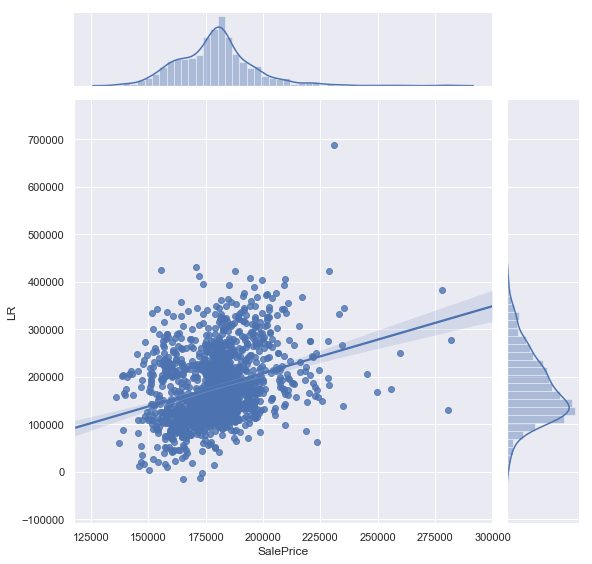

In [66]:
sns.jointplot(x="SalePrice", y="LR", height=8, kind="reg", data=FinTest);

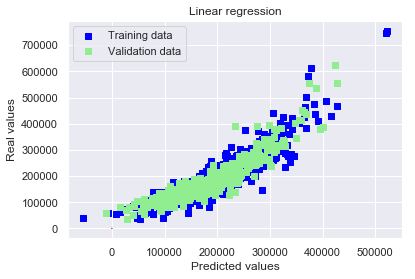

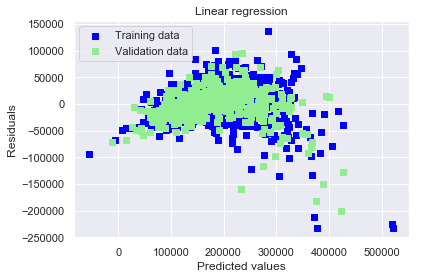

In [67]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

plt.scatter(y_train_pred, y_train, c="blue", marker="s", label="Training data")
plt.scatter(y_test_pred, y_test, c="lightgreen", marker="s", label="Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc="upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c="red")
plt.show()

plt.scatter(
    y_train_pred, y_train_pred - y_train, c="blue", marker="s", label="Training data"
)
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    c="lightgreen",
    marker="s",
    label="Validation data",
)
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=10.5, xmax=13.5, color="red")
plt.show()

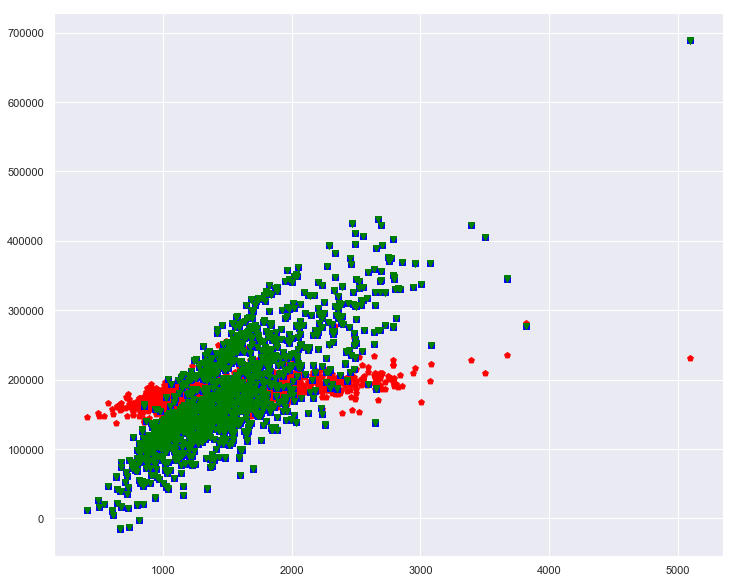

In [68]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(
    x=FinTest.GrLivArea, y=FinTest.SalePrice, c="red", marker="p", label="Sample"
)
plt.scatter(x=FinTest.GrLivArea, y=FinTest.LR, c="blue", marker="s", label="Linear")
plt.scatter(x=FinTest.GrLivArea, y=FinTest.R, c="green", marker="v", label="Ridge")
plt.scatter(x=FinTest.GrLivArea, y=FinTest.LS, c="green", marker="v", label="Lasso");

In [69]:
FinTest[FinTest["LR"] < 0]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,CentralAirV,KitchenQualV,BsmtQualV,BsmtCondV,ExterQualV,HeatingQCV,ExterCondV,SaleConditionV,Id,SalePrice,LR,R,LS
387,1848,20,RL,9000,Pave,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,TA,TA,Slab,NA,NA,NA,NA,0.000,NaN,0.000,0.000,0.000,GasA,Fa,N,SBrkr,660,0,0,660,0.000,0.000,1,0,2,1,Fa,5,Min2,0,NA,NA,NA,0.000,0.000,NA,NA,N,0,0,100,0,0,0,0,6,2009,WD,Normal,0,4.000,0,0,6,4,6,0,1848,165014.533,-14643.426,-14437.391,-14643.425
455,1916,30,NaN,21780,Grvl,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,Fa,Fa,CBlock,NA,NA,NA,NA,0.000,NaN,0.000,0.000,0.000,GasA,TA,N,FuseA,810,0,0,810,0.000,0.000,1,0,1,1,TA,4,Min1,0,Detchd,1975.000,Unf,1.000,280.000,TA,TA,N,119,24,0,0,0,0,0,3,2009,ConLD,Normal,0,6.000,0,0,4,6,4,1,1916,173575.505,-1799.081,-1671.141,-1799.081
756,2217,20,NaN,14584,Pave,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.000,Fa,Po,Slab,NA,NA,NA,NA,0.000,NaN,0.000,0.000,0.000,Wall,Po,N,FuseA,733,0,0,733,0.000,0.000,1,0,2,1,Fa,4,NaN,0,Attchd,1952.000,Unf,2.000,487.000,Fa,Po,N,0,0,0,0,0,0,0,2,2008,WD,Abnorml,0,4.000,0,0,4,2,2,1,2217,172482.166,-12587.136,-12569.836,-12587.135


### Intermediate conclusion

It doesn't seem like a good model ((( I will continue next time. The Ultimate Forecasting Model is on the GO